# 这里是练习代码，正式代码在下文

In [7]:
import netCDF4 as nc
import numpy as np
import pandas as pd

# 训练数据

In [9]:
FILEPATH = 'data/SODA_train.nc'
FILE = nc.Dataset(FILEPATH)

In [10]:
FILE

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): year(100), month(36), lat(24), lon(72)
    variables(dimensions): float32 sst(year, month, lat, lon), float32 t300(year, month, lat, lon), float64 ua(year, month, lat, lon), float64 va(year, month, lat, lon), int32 year(year), int32 month(month), float64 lat(lat), float64 lon(lon)
    groups: 

### 变量含义：温度异常，热含量异常，纬向风异常，经向风异常，年，月，经度，纬度

In [11]:
FILE.variables.keys()

dict_keys(['sst', 't300', 'ua', 'va', 'year', 'month', 'lat', 'lon'])

### 数据维度 ：year, month, lat, lon

In [12]:
FILE.variables

{'sst': <class 'netCDF4._netCDF4.Variable'>
 float32 sst(year, month, lat, lon)
     _FillValue: nan
 unlimited dimensions: 
 current shape = (100, 36, 24, 72)
 filling on, 't300': <class 'netCDF4._netCDF4.Variable'>
 float32 t300(year, month, lat, lon)
     _FillValue: nan
 unlimited dimensions: 
 current shape = (100, 36, 24, 72)
 filling on, 'ua': <class 'netCDF4._netCDF4.Variable'>
 float64 ua(year, month, lat, lon)
     _FillValue: nan
 unlimited dimensions: 
 current shape = (100, 36, 24, 72)
 filling on, 'va': <class 'netCDF4._netCDF4.Variable'>
 float64 va(year, month, lat, lon)
     _FillValue: nan
 unlimited dimensions: 
 current shape = (100, 36, 24, 72)
 filling on, 'year': <class 'netCDF4._netCDF4.Variable'>
 int32 year(year)
 unlimited dimensions: 
 current shape = (100,)
 filling on, default _FillValue of -2147483647 used, 'month': <class 'netCDF4._netCDF4.Variable'>
 int32 month(month)
 unlimited dimensions: 
 current shape = (36,)
 filling on, default _FillValue of -21

### 查看温度异常数据

In [13]:
sst = FILE['sst']

In [14]:
sst

<class 'netCDF4._netCDF4.Variable'>
float32 sst(year, month, lat, lon)
    _FillValue: nan
unlimited dimensions: 
current shape = (100, 36, 24, 72)
filling on

In [15]:
sst_data = sst[:]

In [16]:
sst_data.shape

(100, 36, 24, 72)

### 取出这个维度的数据

另外，如果数据异常，则：真实值 = 打包值 * scale_factor + add_offset

In [18]:
sst_data[0, 0, 1, 1]

1.6091517

### 纬度数据

南纬是负，北纬是正，东经是正，西经是负

In [19]:
lat_data = FILE.variables['lat'][:]

In [20]:
lat_data.shape

(24,)

In [22]:
lat_data

masked_array(data=[-55., -50., -45., -40., -35., -30., -25., -20., -15.,
                   -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,
                    35.,  40.,  45.,  50.,  55.,  60.],
             mask=False,
       fill_value=1e+20)

### 经度数据

In [24]:
lon = FILE.variables['lon'][:]
lon.shape
lon

masked_array(data=[  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,
                    45.,  50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,
                    90.,  95., 100., 105., 110., 115., 120., 125., 130.,
                   135., 140., 145., 150., 155., 160., 165., 170., 175.,
                   180., 185., 190., 195., 200., 205., 210., 215., 220.,
                   225., 230., 235., 240., 245., 250., 255., 260., 265.,
                   270., 275., 280., 285., 290., 295., 300., 305., 310.,
                   315., 320., 325., 330., 335., 340., 345., 350., 355.],
             mask=False,
       fill_value=1e+20)

### 年份

注意：15 个为一组模式

In [26]:
year_data = FILE.variables['year'][:]

In [27]:
year_data.shape
year_data

masked_array(data=[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
                    12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
                    23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
                    34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
                    45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
                    56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
                    67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
                    78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
                    89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
                   100],
             mask=False,
       fill_value=999999)

# 测试数据

In [31]:
LABELPATH = 'data/SODA_label.nc'
LAEBL_FILE = nc.Dataset(LABELPATH)

In [32]:
LAEBL_FILE

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): year(100), month(36)
    variables(dimensions): float64 nino(year, month), int32 year(year), int32 month(month)
    groups: 

In [34]:
LAEBL_FILE.variables.keys()

dict_keys(['nino', 'year', 'month'])

In [35]:
nino_data = LAEBL_FILE.variables['nino'][:]

In [37]:
nino_data.shape

(100, 36)

### 第一年，第一个模式，这 36 个月的异常指数

In [44]:
nino_data[0]

masked_array(data=[-0.40720701, -0.20244436, -0.10386104, -0.02910841,
                   -0.13252996, -0.25527564, -0.3326247 , -0.26293179,
                   -0.08058987,  0.10612228,  0.21165498,  0.16504486,
                    0.06697161,  0.00999126, -0.00164753, -0.06598581,
                   -0.14728385, -0.1915542 , -0.17029583, -0.19376083,
                   -0.27808595, -0.39393583, -0.49975768, -0.58400702,
                   -0.73201811, -0.72508991, -0.58416802, -0.31754819,
                   -0.12046373, -0.03802495,  0.013173  ,  0.06823147,
                    0.0597352 ,  0.02755602,  0.011619  , -0.04931002],
             mask=False,
       fill_value=1e+20)

# 待做

- [ ] 填充数据的处理，或者说，看看有多少填充数据，如何处理这些数据

# 正式代码

# SODA 数据集 EDA

In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
FILEPATH = 'data/SODA_train.nc'
FILE = nc.Dataset(FILEPATH)

## 查看数据维度

In [3]:
for key in FILE.variables.keys():
    print('{:<5}'.format(key), end=' data shape is : ')
    print(FILE.variables[key][:].shape)

sst   data shape is : (100, 36, 24, 72)
t300  data shape is : (100, 36, 24, 72)
ua    data shape is : (100, 36, 24, 72)
va    data shape is : (100, 36, 24, 72)
year  data shape is : (100,)
month data shape is : (36,)
lat   data shape is : (24,)
lon   data shape is : (72,)


## 填充值处理

In [4]:
for key in FILE.variables.keys():
    a = FILE[key]
    if hasattr(a, '_FillValue'):
        print('{:<5} has filled value, which is {}'.format(key, a._FillValue), end=', ')
        print('the number of filled value is {}'.format(np.isnan(np.array(FILE.variables[key][:])).sum()))
    else:
        print('{:<5} doesn\'t has filled value'.format(key))

sst   has filled value, which is nan, the number of filled value is 0
t300  has filled value, which is nan, the number of filled value is 0
ua    has filled value, which is nan, the number of filled value is 0
va    has filled value, which is nan, the number of filled value is 0
year  doesn't has filled value
month doesn't has filled value
lat   has filled value, which is nan, the number of filled value is 0
lon   has filled value, which is nan, the number of filled value is 0


## 年份处理

查看数据一共有多少年的

In [5]:
year_data = np.array(FILE.variables['year'][:])
print("{} years in total.".format(len(year_data)))

100 years in total.


有无重复年

In [6]:
year_cnt = Counter(year_data.flatten())
year_flag = 0
for key, value in year_cnt.items():
    if value > 1:
        year_flag = 1
        print("{} appears {} times".format(key, value))
if year_flag == 0:
    print('All year variables appear once. ')

All year variables appear once. 


## 月份处理

内容同上

In [7]:
month_data = np.array(FILE.variables['month'][:])
print("{} months in total.".format(len(month_data)))

36 months in total.


In [8]:
month_cnt = Counter(month_data.flatten())
month_flag = 0
for key, value in month_cnt.items():
    if value > 1:
        month_flag = 1
        print("{} appears {} times".format(key, value))
if month_flag == 0:
    print('All month variables appear once. ')

All month variables appear once. 


## 经度处理

In [9]:
lon_data = pd.DataFrame({'value' : np.array(FILE.variables['lon'][:])})
# 经度分为 10 个区间
quartiles = pd.cut(lon_data.value, 10, precision=0)

In [10]:
lon_grouped = lon_data.value.groupby(quartiles)
def get_status(group):
    return {'distribution : ' : group.count()}
print('longitude distribution is : ')
print(lon_grouped.apply(get_status).unstack())

longitude distribution is : 
                distribution : 
value                          
(-0.0, 36.0]                  8
(36.0, 71.0]                  7
(71.0, 106.0]                 7
(106.0, 142.0]                7
(142.0, 178.0]                7
(178.0, 213.0]                7
(213.0, 248.0]                7
(248.0, 284.0]                7
(284.0, 320.0]                7
(320.0, 355.0]                8


## 纬度处理

In [11]:
lat_data = pd.DataFrame({'value' : np.array(FILE.variables['lat'][:])})
# 纬度分为 10 个区间
quartiles = pd.cut(lat_data.value, 10, precision=0)

In [12]:
lat_grouped = lat_data.value.groupby(quartiles)
print('latitude distribution is : ')
print(lat_grouped.apply(get_status).unstack())

latitude distribution is : 
                distribution : 
value                          
(-55.0, -44.0]                3
(-44.0, -32.0]                2
(-32.0, -20.0]                2
(-20.0, -9.0]                 3
(-9.0, 2.0]                   2
(2.0, 14.0]                   2
(14.0, 26.0]                  3
(26.0, 37.0]                  2
(37.0, 48.0]                  2
(48.0, 60.0]                  3


## 温度异常处理

In [13]:
sst_data = np.array(FILE.variables['sst'][:])

### 查看重叠数据

In [14]:
print(sst_data[0, 0:36, 1, 1])
print(sst_data[1, 0:36, 1, 1])

[ 1.6091517   0.71986026  0.68220437  0.56383836  0.54306084  0.4583771
  0.19450794  0.13238896  0.09940504 -0.1464066  -0.03570029  0.16862872
  0.38840583  0.5491563   0.54565835  0.3754512   0.45127892  0.42569095
  0.41107863  0.27990633  0.22299826  0.16423787  0.11990864  0.44018087
  0.5232868   0.62889254  0.6486295   0.5473196   0.27443555  0.24724294
  0.30485055  0.31458566  0.2601541   0.169106   -0.07069355  0.3209315 ]
[ 0.38840583  0.5491563   0.54565835  0.3754512   0.45127892  0.42569095
  0.41107863  0.27990633  0.22299826  0.16423787  0.11990864  0.44018087
  0.5232868   0.62889254  0.6486295   0.5473196   0.27443555  0.24724294
  0.30485055  0.31458566  0.2601541   0.169106   -0.07069355  0.3209315
  0.14049093  0.38737735  0.36938617  0.15929121 -0.06760521 -0.16155241
 -0.03605766  0.11249857  0.01562759 -0.18102594 -0.03493248 -0.03082386]


In [15]:
sst_data = sst_data.flatten()
print('The number of sst is {}'.format(len(sst_data)))

The number of sst is 6220800


In [16]:
sst_data = pd.DataFrame({'value' : sst_data})
quartiles = pd.cut(sst_data.value, 10, precision=0)
sst_grouped = sst_data.value.groupby(quartiles)
print('sst data distribution is : ')
print(sst_grouped.apply(get_status).unstack())

sst data distribution is : 
              distribution : 
value                        
(-8.0, -6.0]               26
(-6.0, -5.0]              175
(-5.0, -3.0]             2547
(-3.0, -2.0]            56830
(-2.0, -0.0]          1759244
(-0.0, 1.0]           4243581
(1.0, 3.0]             150516
(3.0, 4.0]               7450
(4.0, 6.0]                363
(6.0, 7.0]                 68


## 热含量异常处理

In [17]:
t300_data = np.array(FILE.variables['t300'][:])
t300_data = t300_data.flatten()
print('The number of t300 is {}'.format(len(t300_data)))

The number of t300 is 6220800


In [18]:
t300_data = pd.DataFrame({'value' : t300_data})
quartiles = pd.cut(t300_data.value, 10, precision=0)
t300_grouped = t300_data.value.groupby(quartiles)
print('t300 data distribution is : ')
print(t300_grouped.apply(get_status).unstack())

t300 data distribution is : 
              distribution : 
value                        
(-6.0, -4.0]               60
(-4.0, -3.0]              738
(-3.0, -2.0]             9315
(-2.0, -0.0]           546861
(-0.0, 1.0]           5574643
(1.0, 2.0]              85249
(2.0, 3.0]               3221
(3.0, 5.0]                479
(5.0, 6.0]                185
(6.0, 7.0]                 49


## 纬向风异常处理

In [19]:
ua_data = np.array(FILE.variables['ua'][:])
ua_data = ua_data.flatten()
print('The number of ua is {}'.format(len(ua_data)))

The number of ua is 6220800


In [20]:
ua_data = pd.DataFrame({'value' : ua_data})
quartiles = pd.cut(ua_data.value, 10, precision=0)
ua_grouped = ua_data.value.groupby(quartiles)
print('ua data distribution is : ')
print(ua_grouped.apply(get_status).unstack())

ua data distribution is : 
                distribution : 
value                          
(-13.0, -11.0]              111
(-11.0, -8.0]               750
(-8.0, -6.0]               6101
(-6.0, -3.0]              72193
(-3.0, -1.0]            1326811
(-1.0, 2.0]             4482793
(2.0, 4.0]               311413
(4.0, 7.0]                19408
(7.0, 10.0]                1181
(10.0, 12.0]                 39


## 经向风异常

In [21]:
va_data = np.array(FILE.variables['va'][:])
va_data = va_data.flatten()
print('The number of va is {}'.format(len(va_data)))

The number of va is 6220800


In [22]:
va_data = pd.DataFrame({'value' : va_data})
quartiles = pd.cut(va_data.value, 10, precision=0)
va_grouped = va_data.value.groupby(quartiles)
print('va data distribution is : ')
print(va_grouped.apply(get_status).unstack())

va data distribution is : 
               distribution : 
value                         
(-12.0, -9.0]               18
(-9.0, -7.0]               399
(-7.0, -5.0]              4988
(-5.0, -2.0]             92072
(-2.0, 0.0]            3485534
(0.0, 2.0]             2568450
(2.0, 5.0]               65980
(5.0, 7.0]                3221
(7.0, 9.0]                 135
(9.0, 12.0]                  3


## 标签数据观察

In [23]:
FILEPATH = 'data/SODA_label.nc'
FILE = nc.Dataset(FILEPATH)

In [24]:
FILE

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): year(100), month(36)
    variables(dimensions): float64 nino(year, month), int32 year(year), int32 month(month)
    groups: 

In [25]:
for key in FILE.variables.keys():
    print('{:<5}'.format(key), end=' data shape is : ')
    print(FILE.variables[key][:].shape)

nino  data shape is : (100, 36)
year  data shape is : (100,)
month data shape is : (36,)


## 填充值处理

In [26]:
for key in FILE.variables.keys():
    a = FILE[key]
    if hasattr(a, '_FillValue'):
        print('{:<5} has filled value, which is {}'.format(key, a._FillValue), end=', ')
        print('the number of filled value is {}'.format(np.isnan(np.array(FILE.variables[key][:])).sum()))
    else:
        print('{:<5} doesn\'t has filled value'.format(key))

nino  has filled value, which is nan, the number of filled value is 0
year  doesn't has filled value
month doesn't has filled value


## 年份观察

In [27]:
year_data = np.array(FILE.variables['year'][:])

year_cnt = Counter(year_data.flatten())
year_flag = 0
for key, value in year_cnt.items():
    if value > 1:
        year_flag = 1
        print("{} appears {} times".format(key, value))
if year_flag == 0:
    print('All year variables appear once. ')

All year variables appear once. 


## 月份观察

In [28]:
month_data = np.array(FILE.variables['month'][:])

month_cnt = Counter(month_data.flatten())
month_flag = 0
for key, value in month_cnt.items():
    if value > 1:
        month_flag = 1
        print("{} appears {} times".format(key, value))
if month_flag == 0:
    print('All month variables appear once. ')

All month variables appear once. 


## nino 观察

### 重叠数据

In [29]:
nino_data = np.array(FILE.variables['nino'][:])
print(nino_data.shape)
print(nino_data[0])
print(nino_data[1])

(100, 36)
[-0.40720701 -0.20244436 -0.10386104 -0.02910841 -0.13252996 -0.25527564
 -0.3326247  -0.26293179 -0.08058987  0.10612228  0.21165498  0.16504486
  0.06697161  0.00999126 -0.00164753 -0.06598581 -0.14728385 -0.1915542
 -0.17029583 -0.19376083 -0.27808595 -0.39393583 -0.49975768 -0.58400702
 -0.73201811 -0.72508991 -0.58416802 -0.31754819 -0.12046373 -0.03802495
  0.013173    0.06823147  0.0597352   0.02755602  0.011619   -0.04931002]
[ 0.06697161  0.00999126 -0.00164753 -0.06598581 -0.14728385 -0.1915542
 -0.17029583 -0.19376083 -0.27808595 -0.39393583 -0.49975768 -0.58400702
 -0.73201811 -0.72508991 -0.58416802 -0.31754819 -0.12046373 -0.03802495
  0.013173    0.06823147  0.0597352   0.02755602  0.011619   -0.04931002
 -0.2593078  -0.56157684 -0.72061253 -0.67269957 -0.58430457 -0.5273878
 -0.4824861  -0.37052664 -0.28829426 -0.31192511 -0.36046785 -0.32623523]


In [39]:
# 拼接数据
label_data = [nino_data[0]] + [nino_data[i, 24:] for i in range(1, nino_data.shape[0])]
label_data = np.concatenate(label_data, axis=0)
print(label_data.shape)

(1224,)


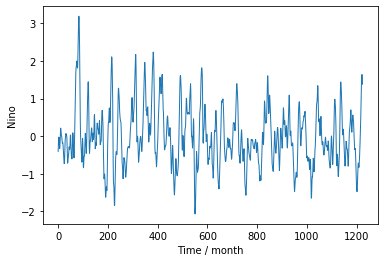

In [40]:
plt.plot(label_data, linewidth=1)
plt.xlabel('Time / month')
plt.ylabel('Nino')
plt.show()

# CMIP 数据集 EDA 

# 数据集

In [41]:
FILEPATH = 'data/CMIP_train.nc'
FILE = nc.Dataset(FILEPATH)

## 数据维度

In [43]:
for key in FILE.variables.keys():
    print('{:<5}'.format(key), end=' data shape is : ')
    print(FILE.variables[key][:].shape)

sst   data shape is : (4645, 36, 24, 72)
t300  data shape is : (4645, 36, 24, 72)
ua    data shape is : (4645, 36, 24, 72)
va    data shape is : (4645, 36, 24, 72)
year  data shape is : (4645,)
month data shape is : (36,)
lat   data shape is : (24,)
lon   data shape is : (72,)


## 填充值处理

In [44]:
for key in FILE.variables.keys():
    a = FILE[key]
    if hasattr(a, '_FillValue'):
        print('{:<5} has filled value, which is {}'.format(key, a._FillValue), end=', ')
        print('the number of filled value is {}'.format(np.isnan(np.array(FILE.variables[key][:])).sum()))
    else:
        print('{:<5} doesn\'t has filled value'.format(key))

sst   has filled value, which is nan, the number of filled value is 0
t300  has filled value, which is nan, the number of filled value is 3055032
ua    has filled value, which is nan, the number of filled value is 13921123
va    has filled value, which is nan, the number of filled value is 13921123
year  doesn't has filled value
month doesn't has filled value
lat   has filled value, which is nan, the number of filled value is 0
lon   has filled value, which is nan, the number of filled value is 0


## 年份处理

In [45]:
year_data = np.array(FILE.variables['year'][:])
print("{} years in total.".format(len(year_data)))

4645 years in total.


In [46]:
year_cnt = Counter(year_data.flatten())
year_flag = 0
for key, value in year_cnt.items():
    if value > 1:
        year_flag = 1
        print("{} appears {} times".format(key, value))
if year_flag == 0:
    print('All year variables appear once. ')

All year variables appear once. 


## 月份处理

In [47]:
month_data = np.array(FILE.variables['month'][:])
print("{} months in total.".format(len(month_data)))

36 months in total.


In [48]:
month_cnt = Counter(month_data.flatten())
month_flag = 0
for key, value in month_cnt.items():
    if value > 1:
        month_flag = 1
        print("{} appears {} times".format(key, value))
if month_flag == 0:
    print('All month variables appear once. ')

All month variables appear once. 


## 经度处理

In [49]:
lon_data = pd.DataFrame({'value' : np.array(FILE.variables['lon'][:])})
# 经度分为 10 个区间
quartiles = pd.cut(lon_data.value, 10, precision=0)

In [50]:
lon_grouped = lon_data.value.groupby(quartiles)
def get_status(group):
    return {'distribution : ' : group.count()}
print('longitude distribution is : ')
print(lon_grouped.apply(get_status).unstack())

longitude distribution is : 
                distribution : 
value                          
(-0.0, 36.0]                  8
(36.0, 71.0]                  7
(71.0, 106.0]                 7
(106.0, 142.0]                7
(142.0, 178.0]                7
(178.0, 213.0]                7
(213.0, 248.0]                7
(248.0, 284.0]                7
(284.0, 320.0]                7
(320.0, 355.0]                8


## 纬度处理

In [51]:
lat_data = pd.DataFrame({'value' : np.array(FILE.variables['lat'][:])})
# 纬度分为 10 个区间
quartiles = pd.cut(lat_data.value, 10, precision=0)

In [52]:
lat_grouped = lat_data.value.groupby(quartiles)
print('latitude distribution is : ')
print(lat_grouped.apply(get_status).unstack())

latitude distribution is : 
                distribution : 
value                          
(-55.0, -44.0]                3
(-44.0, -32.0]                2
(-32.0, -20.0]                2
(-20.0, -9.0]                 3
(-9.0, 2.0]                   2
(2.0, 14.0]                   2
(14.0, 26.0]                  3
(26.0, 37.0]                  2
(37.0, 48.0]                  2
(48.0, 60.0]                  3


## 温度异常处理

In [53]:
sst_data = np.array(FILE.variables['sst'][:])

### 查看重叠数据

In [54]:
print(sst_data[0, 0:36, 1, 1])
print(sst_data[1, 0:36, 1, 1])

[ 2.02001572e-01  2.81116962e-01  4.96657848e-01  4.26758289e-01
  2.86252975e-01  6.83760643e-02 -1.33986473e-02  5.84840775e-04
 -9.28599834e-02 -2.25684166e-01 -4.55626965e-01 -3.51200581e-01
 -6.52111530e-01 -8.60989571e-01 -8.34579468e-01 -6.62024498e-01
 -5.92985392e-01 -5.23464203e-01 -3.58994722e-01 -2.62998819e-01
 -1.43400431e-01  5.42902946e-02 -5.88419437e-02 -4.59293842e-01
 -4.40512180e-01 -1.97493076e-01 -2.28431225e-01  8.13550949e-02
 -1.91537857e-01 -4.74525690e-01 -4.11816597e-01 -4.40829515e-01
 -4.92228985e-01 -5.02949715e-01 -4.18836832e-01 -2.09059715e-01]
[-0.65211153 -0.86098957 -0.83457947 -0.6620245  -0.59298539 -0.5234642
 -0.35899472 -0.26299882 -0.14340043  0.05429029 -0.05884194 -0.45929384
 -0.44051218 -0.19749308 -0.22843122  0.08135509 -0.19153786 -0.47452569
 -0.4118166  -0.44082952 -0.49222898 -0.50294971 -0.41883683 -0.20905972
  0.06607008 -0.11251736 -0.10042238 -0.28687048 -0.38001776 -0.18929338
 -0.22970104 -0.12138414 -0.04502177 -0.04514074 -

In [55]:
sst_data = sst_data.flatten()
print('The number of sst is {}'.format(len(sst_data)))

The number of sst is 288956160


In [56]:
sst_data = pd.DataFrame({'value' : sst_data})
quartiles = pd.cut(sst_data.value, 10, precision=0)
sst_grouped = sst_data.value.groupby(quartiles)
print('sst data distribution is : ')
print(sst_grouped.apply(get_status).unstack())

sst data distribution is : 
                distribution : 
value                          
(-17.0, -14.0]               21
(-14.0, -11.0]               53
(-11.0, -9.0]              1080
(-9.0, -6.0]              15726
(-6.0, -3.0]             213837
(-3.0, -1.0]           51137376
(-1.0, 2.0]           236988175
(2.0, 5.0]               589029
(5.0, 8.0]                10553
(8.0, 10.0]                 310


### 热含量异常处理

In [57]:
t300_data = np.array(FILE.variables['t300'][:])
t300_data = t300_data.flatten()
print('The number of t300 is {}'.format(len(t300_data)))

The number of t300 is 288956160


In [58]:
t300_data = pd.DataFrame({'value' : t300_data})
quartiles = pd.cut(t300_data.value, 10, precision=0)
t300_grouped = t300_data.value.groupby(quartiles)
print('t300 data distribution is : ')
print(t300_grouped.apply(get_status).unstack())

t300 data distribution is : 
                distribution : 
value                          
(-12.0, -10.0]              152
(-10.0, -8.0]               628
(-8.0, -6.0]               4911
(-6.0, -3.0]              68090
(-3.0, -1.0]            3000750
(-1.0, 1.0]           276822943
(1.0, 3.0]              5937445
(3.0, 5.0]                61315
(5.0, 7.0]                 4433
(7.0, 9.0]                  461


In [61]:
# 缺失值不在分布内
152+628+4911+68090+3000750+276822943+5937445+61315+4433+461-288956160+3055032

0

## 纬向风异常处理

In [62]:
ua_data = np.array(FILE.variables['ua'][:])
ua_data = ua_data.flatten()
print('The number of ua is {}'.format(len(ua_data)))

The number of ua is 288956160


In [63]:
ua_data = pd.DataFrame({'value' : ua_data})
quartiles = pd.cut(ua_data.value, 10, precision=0)
ua_grouped = ua_data.value.groupby(quartiles)
print('ua data distribution is : ')
print(ua_grouped.apply(get_status).unstack())

ua data distribution is : 
                distribution : 
value                          
(-22.0, -19.0]               36
(-19.0, -15.0]             1016
(-15.0, -11.0]            20767
(-11.0, -7.0]            352119
(-7.0, -4.0]            5723652
(-4.0, 0.1]           142939752
(0.1, 4.0]            121734110
(4.0, 8.0]              4180308
(8.0, 11.0]               82443
(11.0, 15.0]                834


## 经向风异常

In [64]:
va_data = np.array(FILE.variables['va'][:])
va_data = va_data.flatten()
print('The number of va is {}'.format(len(va_data)))

The number of va is 288956160


In [65]:
va_data = pd.DataFrame({'value' : va_data})
quartiles = pd.cut(va_data.value, 10, precision=0)
va_grouped = va_data.value.groupby(quartiles)
print('va data distribution is : ')
print(va_grouped.apply(get_status).unstack())

va data distribution is : 
                distribution : 
value                          
(-18.0, -14.0]               45
(-14.0, -11.0]             1637
(-11.0, -7.0]             45955
(-7.0, -4.0]            1770911
(-4.0, -0.0]          105214916
(-0.0, 3.0]           164877927
(3.0, 7.0]              3068153
(7.0, 10.0]               54162
(10.0, 14.0]               1274
(14.0, 17.0]                 57


## 标签数据观察

In [66]:
FILEPATH = 'data/CMIP_label.nc'
FILE = nc.Dataset(FILEPATH)

In [67]:
for key in FILE.variables.keys():
    print('{:<5}'.format(key), end=' data shape is : ')
    print(FILE.variables[key][:].shape)

nino  data shape is : (4645, 36)
year  data shape is : (4645,)
month data shape is : (36,)


In [68]:
for key in FILE.variables.keys():
    a = FILE[key]
    if hasattr(a, '_FillValue'):
        print('{:<5} has filled value, which is {}'.format(key, a._FillValue), end=', ')
        print('the number of filled value is {}'.format(np.isnan(np.array(FILE.variables[key][:])).sum()))
    else:
        print('{:<5} doesn\'t has filled value'.format(key))

nino  has filled value, which is nan, the number of filled value is 0
year  doesn't has filled value
month doesn't has filled value


## nino 数据观察

有重叠项

In [70]:
nino_data = np.array(FILE.variables['nino'][:])
print(nino_data.shape)
print(nino_data[0])
print(nino_data[1])

(4645, 36)
[-0.26102549 -0.13325377 -0.01483156  0.10506672  0.24070978  0.3849988
  0.46769741  0.49836656  0.45298234  0.35320151  0.13045476 -0.22466083
 -0.51252842 -0.67330021 -0.69312692 -0.62691498 -0.54981941 -0.47077212
 -0.43879238 -0.45885882 -0.5298723  -0.66582316 -0.67307574 -0.53411871
 -0.16938901  0.16518302  0.42523685  0.51058745  0.61095256  0.73109442
  0.833076    0.78988576  0.74149543  0.70016259  0.69692588  0.62087137]
[-0.51252842 -0.67330021 -0.69312692 -0.62691498 -0.54981941 -0.47077212
 -0.43879238 -0.45885882 -0.5298723  -0.66582316 -0.67307574 -0.53411871
 -0.16938901  0.16518302  0.42523685  0.51058745  0.61095256  0.73109442
  0.833076    0.78988576  0.74149543  0.70016259  0.69692588  0.62087137
  0.36371359 -0.01698022 -0.53221828 -1.08626425 -1.66381609 -2.2916038
 -2.75982594 -3.09878922 -3.26644039 -3.32816887 -3.33858109 -3.00591755]


In [71]:
label_data = [nino_data[0]] + [nino_data[i, 24:] for i in range(1, nino_data.shape[0])]
label_data = np.concatenate(label_data, axis=0)
print(label_data.shape)

(55764,)


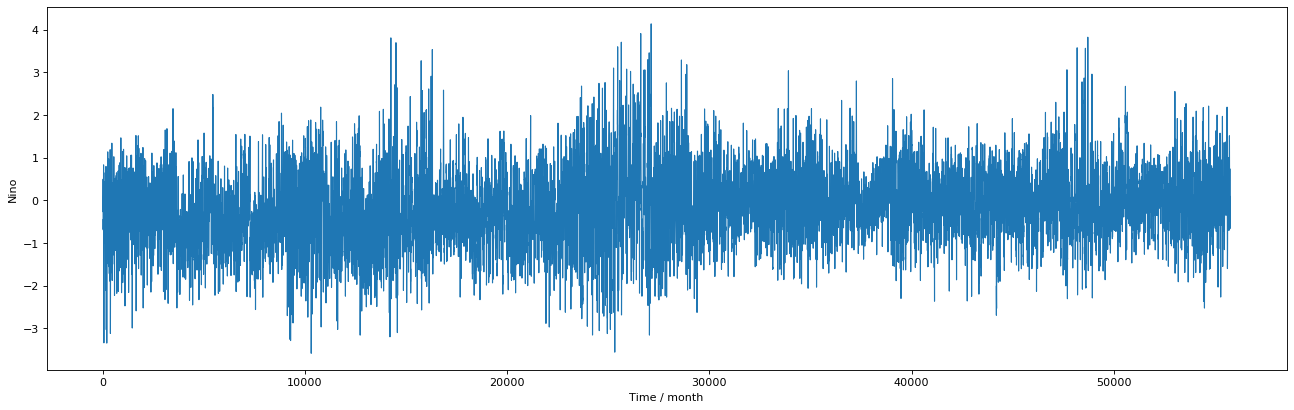

In [74]:
plt.figure(figsize=(20, 6),dpi=80)
plt.plot(label_data, linewidth=1)
plt.xlabel('Time / month')
plt.ylabel('Nino')
plt.show()

# 查看缺失值的分布

In [14]:
FILEPATH = 'data/CMIP_train.nc'
FILE = nc.Dataset(FILEPATH)
keys_ = ['t300', 'ua']
year = np.array([1])

for key in keys_:
    tmp1 = np.array(FILE.variables[key][:])
    all_data = np.where(np.isnan(tmp1))

    data = all_data[0]
    year = np.append(year, data)
    print(len(np.unique(year[1:])))

    print(np.unique(year[1:]))

151
[1812 1813 1814 1815 1816 1817 1818 1819 1820 1821 1822 1823 1824 1825
 1826 1827 1828 1829 1830 1831 1832 1833 1834 1835 1836 1837 1838 1839
 1840 1841 1842 1843 1844 1845 1846 1847 1848 1849 1850 1851 1852 1853
 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865 1866 1867
 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881
 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895
 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909
 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923
 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937
 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951
 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962]
755
[ 755  756  757  758  759  760  761  762  763  764  765  766  767  768
  769  770  771  772  773  774  775  776  777  778  779  780  781  782
  783  784  785  786  787  788  789  790  791  792  793  794  795  796
  797  798  

In [ ]:
#     for col in range(4):
#         if col == 1:
#             continue
#         data = pd.DataFrame({'value' : all_data[col]})
        
#         quartiles = pd.cut(data.value, 10, precision=0)
#         data_grouped = data.value.groupby(quartiles)
#         if col == 0:
#             print('{} year distribution is : '.format(key))
#         if col == 2:
#             print('{} lat distribution is : '.format(key))
#         if col == 3:
#             print('{} lon distribution is : '.format(key))
#         print(data_grouped.apply(get_status).unstack()) 

In [123]:
data = np.array(range(100), dtype=np.float).reshape(20, 5)
data

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24.],
       [25., 26., 27., 28., 29.],
       [30., 31., 32., 33., 34.],
       [35., 36., 37., 38., 39.],
       [40., 41., 42., 43., 44.],
       [45., 46., 47., 48., 49.],
       [50., 51., 52., 53., 54.],
       [55., 56., 57., 58., 59.],
       [60., 61., 62., 63., 64.],
       [65., 66., 67., 68., 69.],
       [70., 71., 72., 73., 74.],
       [75., 76., 77., 78., 79.],
       [80., 81., 82., 83., 84.],
       [85., 86., 87., 88., 89.],
       [90., 91., 92., 93., 94.],
       [95., 96., 97., 98., 99.]])

In [124]:
data[:, 0]

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
       65., 70., 75., 80., 85., 90., 95.])

In [17]:
cnt = 0
for i in range (1, 16):
    print(i, cnt, cnt + 150)
    cnt += 151

1 0 150
2 151 301
3 302 452
4 453 603
5 604 754
6 755 905
7 906 1056
8 1057 1207
9 1208 1358
10 1359 1509
11 1510 1660
12 1661 1811
13 1812 1962
14 1963 2113
15 2114 2264
